In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()

C:\Users\sonip\AppData\Local\Temp\ipykernel_17052\733471175.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salary_per_job , labels=job_titles , vert= False)


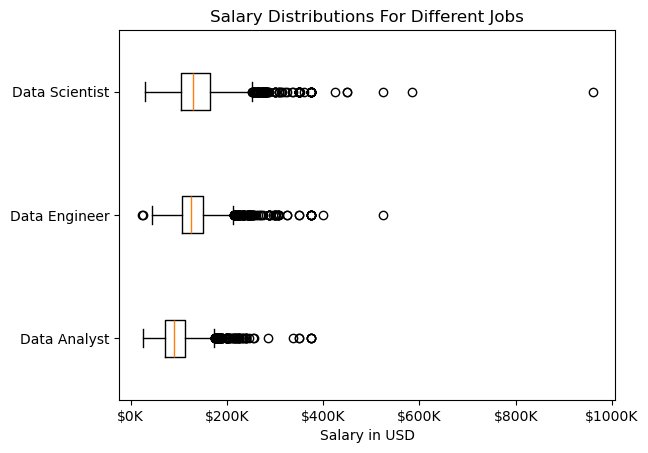

In [2]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_country']=='United States') & (df['job_title_short'].isin(job_titles)) ].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
# salary_per_job = []
# for job_title in job_titles:
#     salary_per_job.append(df_US[df_US['job_title_short']==job_title]['salary_year_avg'])

# OR

salary_per_job = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]
from matplotlib import ticker as mtick
plt.boxplot(salary_per_job , labels=job_titles , vert= False)
plt.title('Salary Distributions For Different Jobs')
plt.xlabel('Salary in USD')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

In [3]:
import seaborn as sns

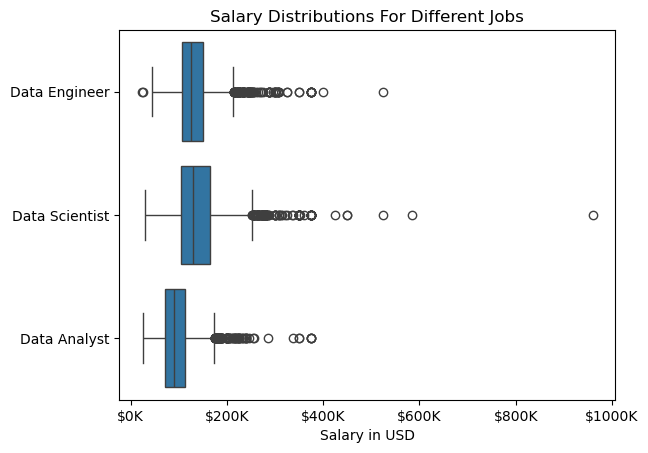

In [8]:
sns.boxplot(data=df_US, y=df_US['job_title_short'], x='salary_year_avg')
plt.title('Salary Distributions For Different Jobs')
plt.xlabel('Salary in USD')
plt.ylabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))